<a href="https://colab.research.google.com/github/varun-22-98/DataScience-Projects/blob/python/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

#ignoore warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.style.use('ggplot')

#getting max rows anc columns without truncating
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
customer = pd.read_csv('/content/Customers.csv', encoding='latin-1')
product = pd.read_csv('/content/Products.csv', encoding='latin-1')
sale = pd.read_csv('/content/Sales (1).csv', encoding='latin-1')

In [4]:
customers=customer.copy()
products=product.copy()
sales=sale.copy()

In [5]:
customers.Birthday=pd.to_datetime(customers.Birthday)

In [6]:
customers.CustomerKey=customers.CustomerKey.astype('object')

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  object        
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15256 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(9)
memory usage: 1.2+ MB


In [8]:
products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [10]:
products.ProductKey=products.ProductKey.astype('object')
products.SubcategoryKey=products.SubcategoryKey.astype('object')
products.CategoryKey=products.CategoryKey.astype('object')
products['Unit Cost USD']=products['Unit Cost USD'].str.replace('$','').str.replace(',', '').str.strip().astype('float')
products['Unit Price USD']=products['Unit Price USD'].str.replace('$','').str.replace(',', '').str.strip().astype('float')


In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   object 
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   object 
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   object 
 9   Category        2517 non-null   object 
dtypes: float64(2), object(8)
memory usage: 196.8+ KB


In [12]:
sales.isna().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [41]:
sales['Order Number']=sales['Order Number'].astype('object')
sales['Line Item']=sales['Line Item'].astype('object')
sales['StoreKey']=sales['StoreKey'].astype('object')
sales['ProductKey']=sales['ProductKey'].astype('object')
sales['Delivery Date']=pd.to_datetime(sales['Delivery Date'])
sales['Order Date']=pd.to_datetime(sales['Order Date'], errors='coerce')
sales['days to deliver']=(sales['Delivery Date']-sales['Order Date']).dt.days

sales['Order Month']=sales['Order Date'].dt.month.astype('object')
sales['Order Year']=sales['Order Date'].dt.year.astype('object')
sales['Order Month Name']=sales['Order Date'].dt.month_name()
sales['Order Quarter']=sales['Order Date'].dt.quarter.astype('object')


In [15]:
sales['Order Date'].value_counts()

Order Date
2019-12-21    222
2020-01-04    219
2019-12-28    215
2018-12-29    206
2020-02-22    204
             ... 
2017-06-11      1
2018-07-08      1
2019-03-17      1
2018-08-19      1
2016-10-16      1
Name: count, Length: 1641, dtype: int64

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Number      62884 non-null  object        
 1   Line Item         62884 non-null  object        
 2   Order Date        62884 non-null  datetime64[ns]
 3   Delivery Date     13165 non-null  datetime64[ns]
 4   CustomerKey       62884 non-null  int64         
 5   StoreKey          62884 non-null  object        
 6   ProductKey        62884 non-null  object        
 7   Quantity          62884 non-null  int64         
 8   Currency Code     62884 non-null  object        
 9   days to deliver   13165 non-null  float64       
 10  Order Month       62884 non-null  int32         
 11  Order Year        62884 non-null  int32         
 12  Order Month Name  62884 non-null  object        
 13  Order Quarter     62884 non-null  int32         
dtypes: datetime64[ns](2), 

In [42]:

# Define a function to determine delivery status
def determine_delivery_status(delivery_time):
    if pd.isna(delivery_time):
        return 'Unknown'
    elif delivery_time > 0:
        return 'Delivered'
    else:
        return 'Error: Negative delivery time'

sales['Delivery Status'] = sales['days to deliver'].apply(determine_delivery_status)

# Print the DataFrame


In [43]:
sales['days to deliver'].mean()

4.529130269654386

In [44]:
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,days to deliver,Order Month,Order Year,Order Month Name,Order Quarter,Delivery Status
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,NaN,1,2016,January,1,Unknown
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,12.0,1,2016,January,1,Delivered
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,12.0,1,2016,January,1,Delivered
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,11.0,1,2016,January,1,Delivered
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,11.0,1,2016,January,1,Delivered


In [45]:
sales_insight_df=pd.merge(sales,products,on='ProductKey')
sales_insight_df=pd.merge(sales_insight_df,customers,on='CustomerKey').sort_values('Order Number',ascending=True)

In [46]:
sales_insight_df.head(10)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,days to deliver,Order Month,Order Year,Order Month Name,Order Quarter,Delivery Status,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,NaN,1,2016,January,1,Unknown,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23
169,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,12.0,1,2016,January,1,Delivered,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20
168,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,12.0,1,2016,January,1,Delivered,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20
389,366002,3,2016-01-01,2016-01-12,266019,0,1080,4,CAD,11.0,1,2016,January,1,Delivered,Contoso SLR Camera X143 Silver,Contoso,Silver,214.03,646.00,402,Digital SLR Cameras,4,Cameras and camcorders,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24
388,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,11.0,1,2016,January,1,Delivered,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24
387,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,11.0,1,2016,January,1,Delivered,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24
882,366004,2,2016-01-01,NaT,1107461,38,1529,2,GBP,NaN,1,2016,January,1,Unknown,The Phone Company PDA Handheld 3.5 inch M610 B...,The Phone Company,Black,117.27,255.00,504,Smart phones & PDAs,5,Cell phones,Male,Sam Nelson,BURSCOUGH BRIDGE,West Lancashire,West Lancashire,L40 8UX,United Kingdom,Europe,1979-11-28
881,366004,1,2016-01-01,NaT,1107461,38,163,6,GBP,NaN,1,2016,January,1,Unknown,"Adventure Works 52"" LCD HDTV X790W White",Adventure Works,White,527.53,1592.20,201,Televisions,2,TV and Video,Male,Sam Nelson,BURSCOUGH BRIDGE,West Lancashire,West Lancashire,L40 8UX,United Kingdom,Europe,1979-11-28
1494,366005,1,2016-01-01,NaT,844003,33,421,4,EUR,NaN,1,2016,January,1,Unknown,Adventure Works Desktop PC3.0 MS300 Silver,Adventure Works,Silver,215.68,469.00,303,Desktops,3,Computers,Male,Ouassim Heuver,Leeuwarden,FR,Friesland,8916 CD,Netherlands,Europe,1995-06-22
2687,366007,1,2016-01-01,NaT,2035771,43,1617,1,USD,NaN,1,2016,January,1,Unknown,Contoso DVD Player M110 Silver,Contoso,Silver,26.67,57.99,602,Movie DVD,6,"Music, Movies and Audio Books",Female,Damiana Corona,Winchester,VA,Virginia,22601,United States,North America,1944-10-30


In [33]:
sales_insight_df.shape

(62884, 33)

In [47]:
sales_insight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62884 entries, 0 to 32044
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Number      62884 non-null  object        
 1   Line Item         62884 non-null  object        
 2   Order Date        62884 non-null  datetime64[ns]
 3   Delivery Date     13165 non-null  datetime64[ns]
 4   CustomerKey       62884 non-null  object        
 5   StoreKey          62884 non-null  object        
 6   ProductKey        62884 non-null  object        
 7   Quantity          62884 non-null  int64         
 8   Currency Code     62884 non-null  object        
 9   days to deliver   13165 non-null  float64       
 10  Order Month       62884 non-null  object        
 11  Order Year        62884 non-null  object        
 12  Order Month Name  62884 non-null  object        
 13  Order Quarter     62884 non-null  object        
 14  Delivery Status   62884 non

In [48]:
sales_insight_df['Total Cost']=sales_insight_df['Quantity']*sales_insight_df['Unit Cost USD']
sales_insight_df['Total Price']=sales_insight_df['Quantity']*sales_insight_df['Unit Price USD']
sales_insight_df['Profit']=sales_insight_df['Total Price']-sales_insight_df['Total Cost']
sales_insight_df['Profit Margin']=round(sales_insight_df['Profit']*100/sales_insight_df['Total Cost'],2)


In [49]:
sales_insight_df.head(10)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,days to deliver,Order Month,Order Year,Order Month Name,Order Quarter,Delivery Status,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Total Cost,Total Price,Profit,Profit Margin
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,NaN,1,2016,January,1,Unknown,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,31.27,68.00,36.73,117.46
169,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,12.0,1,2016,January,1,Delivered,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,220.64,665.94,445.30,201.82
168,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,12.0,1,2016,January,1,Delivered,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,282.94,854.00,571.06,201.83
389,366002,3,2016-01-01,2016-01-12,266019,0,1080,4,CAD,11.0,1,2016,January,1,Delivered,Contoso SLR Camera X143 Silver,Contoso,Silver,214.03,646.00,402,Digital SLR Cameras,4,Cameras and camcorders,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,856.12,2584.00,1727.88,201.83
388,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,11.0,1,2016,January,1,Delivered,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,166.20,326.00,159.80,96.15
387,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,11.0,1,2016,January,1,Delivered,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,1036.56,2254.00,1217.44,117.45
882,366004,2,2016-01-01,NaT,1107461,38,1529,2,GBP,NaN,1,2016,January,1,Unknown,The Phone Company PDA Handheld 3.5 inch M610 B...,The Phone Company,Black,117.27,255.00,504,Smart phones & PDAs,5,Cell phones,Male,Sam Nelson,BURSCOUGH BRIDGE,West Lancashire,West Lancashire,L40 8UX,United Kingdom,Europe,1979-11-28,234.54,510.00,275.46,117.45
881,366004,1,2016-01-01,NaT,1107461,38,163,6,GBP,NaN,1,2016,January,1,Unknown,"Adventure Works 52"" LCD HDTV X790W White",Adventure Works,White,527.53,1592.20,201,Televisions,2,TV and Video,Male,Sam Nelson,BURSCOUGH BRIDGE,West Lancashire,West Lancashire,L40 8UX,United Kingdom,Europe,1979-11-28,3165.18,9553.20,6388.02,201.82
1494,366005,1,2016-01-01,NaT,844003,33,421,4,EUR,NaN,1,2016,January,1,Unknown,Adventure Works Desktop PC3.0 MS300 Silver,Adventure Works,Silver,215.68,469.00,303,Desktops,3,Computers,Male,Ouassim Heuver,Leeuwarden,FR,Friesland,8916 CD,Netherlands,Europe,1995-06-22,862.72,1876.00,1013.28,117.45
2687,366007,1,2016-01-01,NaT,2035771,43,1617,1,USD,NaN,1,2016,January,1,Unknown,Contoso DVD Player M110 Silver,Contoso,Silver,26.67,57.99,602,Movie DVD,6,"Music, Movies and Audio Books",Female,Damiana Corona,Winchester,VA,Virginia,22601,United States,North America,1944-10-30,26.67,57.99,31.32,117.44


## USER SEGMENTATION

In [85]:
# df=sales_insight_df.copy()


In [96]:
def remove_outliers_IQR(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Apply the outlier removal function to the DataFrame
numerical_variable=['Quantity','Unit Price USD','Unit Cost USD']
for i in numerical_variable:
  df=remove_outliers_IQR(df, i)


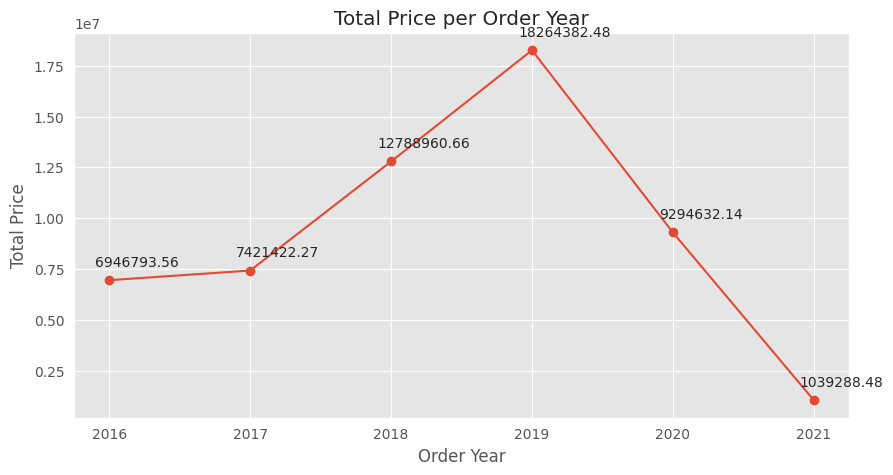

In [102]:
data = sales_insight_df.groupby('Order Year')['Total Price'].sum().sort_index()

# Create the plot
plt.figure(figsize=(10,5))
plt.plot(data.index, data.values, marker='o')

# Add labels to each data point
for i, v in enumerate(data.values):
    plt.annotate(str(round(v, 2)), (data.index[i], v), xytext=(-10,10), textcoords='offset points')

plt.title('Total Price per Order Year')
plt.xlabel('Order Year')
plt.ylabel('Total Price')
plt.show()

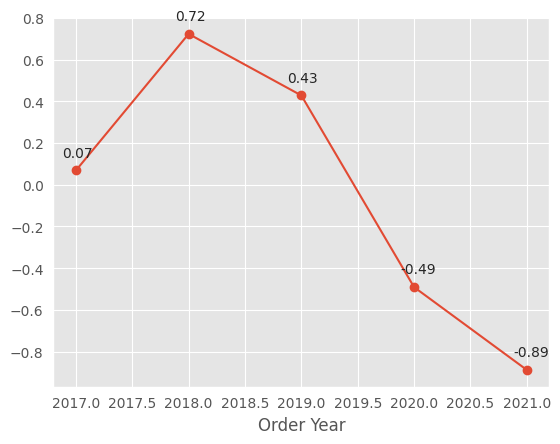

In [101]:
data_diff = data.diff()
growth_rate = data_diff / data.shift(1)
growth_rate.plot(kind='line', marker='o')
for i, v in enumerate(growth_rate.values):
    plt.annotate(str(round(v, 2)), (growth_rate.index[i], v), xytext=(-10,10), textcoords='offset points')

we can see 50% drop in 2020 compared to previous year


### Gender Wise Analysis



<Axes: ylabel='count'>

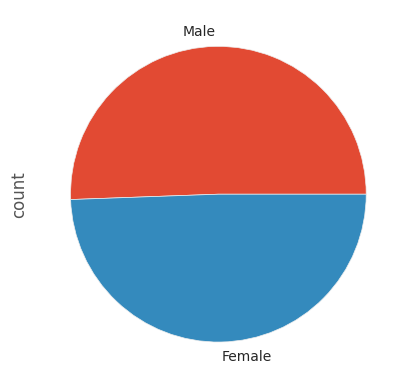

In [88]:
sales_insight_df['Gender'].value_counts().plot(kind='pie')

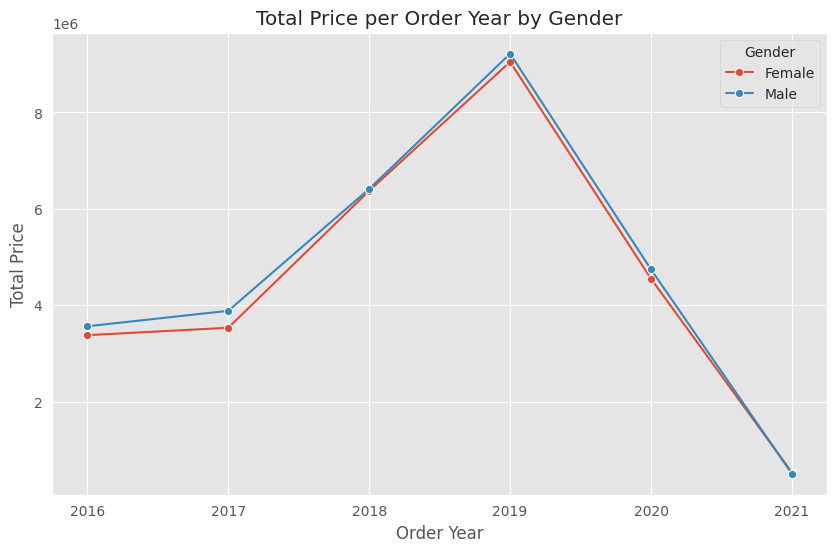

In [104]:
data = sales_insight_df.groupby(['Order Year', 'Gender'])['Total Price'].sum().reset_index()

# Create a line plot with 'Gender' as hue
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='Order Year', y='Total Price', hue='Gender', marker='o')
plt.title('Total Price per Order Year by Gender')
plt.xlabel('Order Year')
plt.ylabel('Total Price')
plt.show()

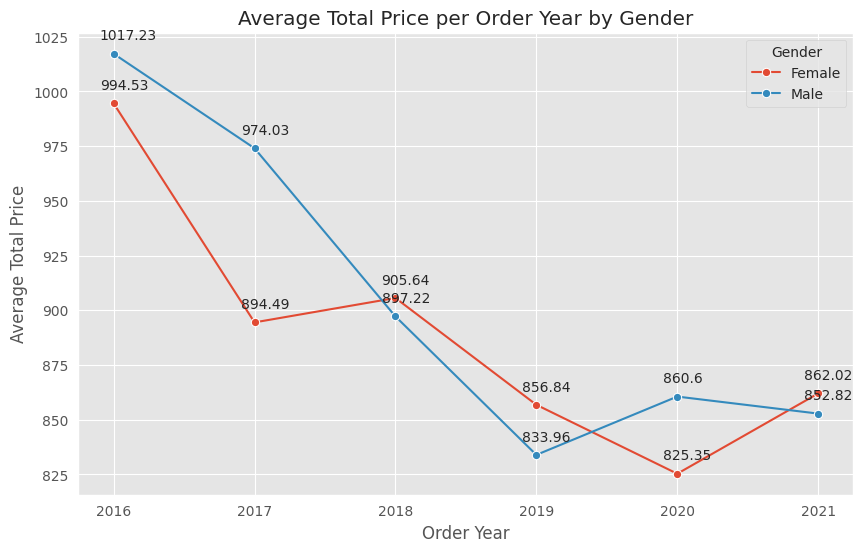

In [118]:
data = sales_insight_df.groupby(['Order Year', 'Gender'])['Total Price'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='Order Year', y='Total Price', hue='Gender', marker='o')
plt.title('Average Total Price per Order Year by Gender')

# Add labels to each data point
for i in range(len(data)):
    plt.annotate(str(round(data['Total Price'].iloc[i], 2)),
                 (data['Order Year'].iloc[i], data['Total Price'].iloc[i]),
                 xytext=(-10,10), textcoords='offset points')

plt.xlabel('Order Year')
plt.ylabel('Average Total Price')
plt.show()


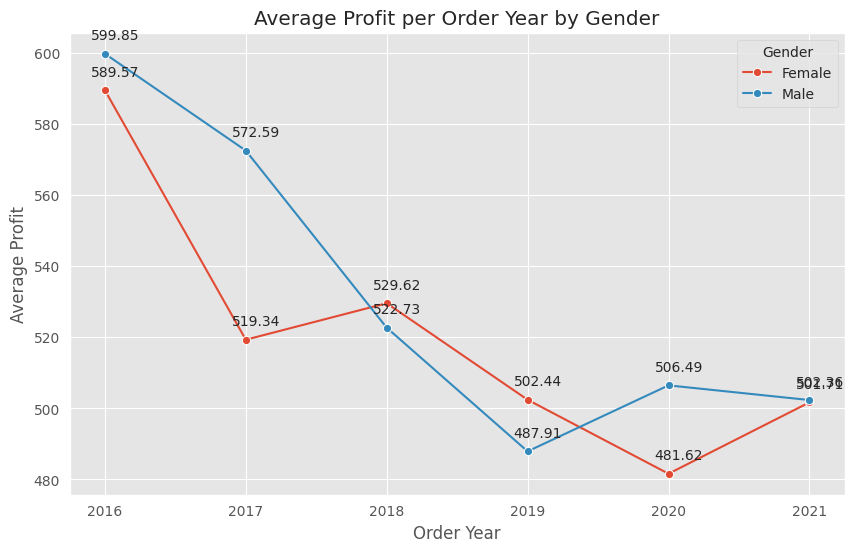

In [119]:
data = sales_insight_df.groupby(['Order Year', 'Gender'])['Profit'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='Order Year', y='Profit', hue='Gender', marker='o')
plt.title('Average Profit per Order Year by Gender')

# Add labels to each data point
for i in range(len(data)):
    plt.annotate(str(round(data['Profit'].iloc[i], 2)),
                 (data['Order Year'].iloc[i], data['Profit'].iloc[i]),
                 xytext=(-10,10), textcoords='offset points')

plt.xlabel('Order Year')
plt.ylabel('Average Profit')
plt.show()


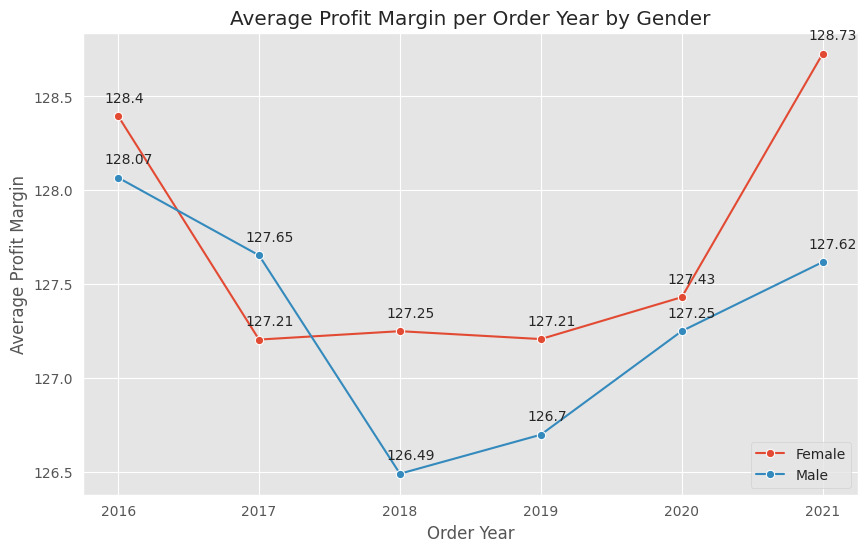

In [121]:
data = sales_insight_df.groupby(['Order Year', 'Gender'])['Profit Margin'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='Order Year', y='Profit Margin', hue='Gender', marker='o')
plt.title('Average Profit Margin per Order Year by Gender')

# Add labels to each data point
for i in range(len(data)):
    plt.annotate(str(round(data['Profit Margin'].iloc[i], 2)),
                 (data['Order Year'].iloc[i], data['Profit Margin'].iloc[i]),
                 xytext=(-10,10), textcoords='offset points')

plt.xlabel('Order Year')
plt.ylabel('Average Profit Margin')
plt.legend(loc='lower right')

plt.show()